In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Data exploration and preprocessing
df = pd.read_csv('Housing.csv')
df = pd.get_dummies(df, drop_first=True)

In [4]:
# Feature selection
X = df.drop(['price'], axis=1)
y = df['price']

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Add a column of ones to include the intercept term in the model
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [8]:
def gradient_descent(X, y, learning_rate, iterations):
    m = X.shape[0]  # Number of training examples
    n = X.shape[1]  # Number of features
    theta = np.zeros(n)
    history = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta -= learning_rate * gradient
        cost = (1/2*m) * np.sum(errors**2)
        history.append(cost)

    return theta, history

In [9]:
# Different learning rates
learning_rates = [0.01, 0.1, 0.5]
iterations = 1000

for lr in learning_rates:
    theta, history = gradient_descent(X_train, y_train, lr, iterations)
    
    # Predictions
    y_pred = X_test.dot(theta)

In [10]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
print(f'Learning Rate: {lr}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
    

Learning Rate: 0.5
Mean Squared Error: 1754318687330.6682
R^2 Score: 0.6529242642153175


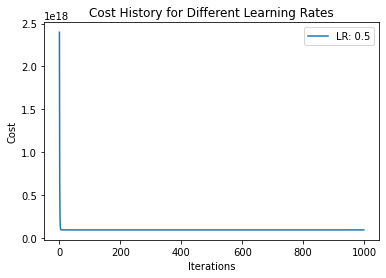

In [13]:
 # Plot the cost history
plt.plot(history, label=f'LR: {lr}')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History for Different Learning Rates')
plt.legend()
plt.show()